## Observations and Insights

In [1]:
#The tumor volume was lower when the weight of the mouse was less as is shown in the correlation study.
#Capomulin and ramicane had the lowest tumor volume averages as is shown in the box plots.
#Capmulin and Ramicane had the most mice do their regimen. 
#The male and female mouse distribution was very equal. 
# Infubinol was the only regimen that came back with an outlier with a way smaller tumor volume than the rest in that study. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "C:/Users/Ozzmo/Documents/Mouse_metadata.csv"
study_results = "C:/Users/Ozzmo/Documents/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen = combined_data.groupby(["Drug Regimen"])
summary = pd.DataFrame(regimen["Tumor Volume (mm3)"].mean())
summary["Median"] = regimen["Tumor Volume (mm3)"].median()
summary["Variance"] = regimen["Tumor Volume (mm3)"].var()
summary["Standard Deviation"] = regimen["Tumor Volume (mm3)"].std()
summary["SEM"] = regimen["Tumor Volume (mm3)"].sem()

summary = summary.rename(columns={"Tumor Volume (mm3)":"Mean"})

summary

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar plots

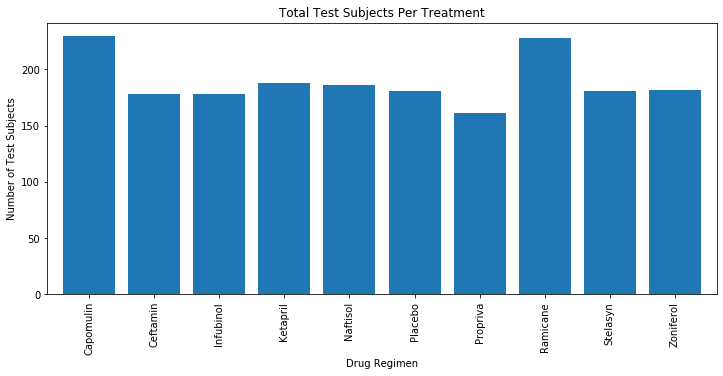

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_and_regimen = pd.DataFrame(regimen["Mouse ID"].count())

mice_and_regimen.plot(kind="bar", width=0.8, figsize=(12,5), legend=None)

plt.title("Total Test Subjects Per Treatment")
plt.ylabel("Number of Test Subjects")
plt.show()

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen2 = combined_data.groupby(["Drug Regimen"])
mcount = regimen2[["Mouse ID"]].count()
mcount = mcount.reset_index()
mcount

Drug Regimen  Mouse ID
0    Capomulin       230
1     Ceftamin       178
2    Infubinol       178
3     Ketapril       188
4     Naftisol       186
5      Placebo       181
6     Propriva       161
7     Ramicane       228
8     Stelasyn       181
9    Zoniferol       182

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

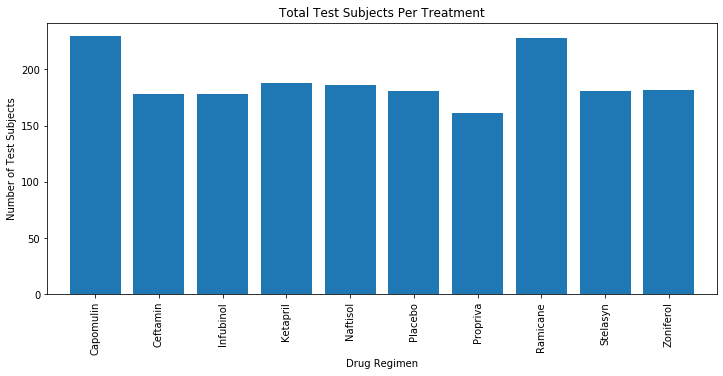

In [6]:
plt.figure(figsize=(12,5))
plt.bar(mcount["Drug Regimen"], mcount["Mouse ID"], color=None, align="center")

plt.xlim(-0.75, len(mcount["Drug Regimen"])-0.25)
plt.title("Total Test Subjects Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Test Subjects")
plt.xticks(rotation=90)

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gend = combined_data.groupby(["Mouse ID"])
gend_count = grouped_gend["Sex"].describe()
gend_count = gend_count["top"].value_counts()

gend_count

Male      125
Female    124
Name: top, dtype: int64

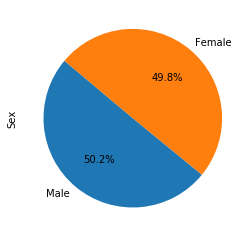

In [8]:
gend_df = pd.DataFrame({"Sex": [125, 124]}, index=["Male", "Female"])
gend_pie = gend_df.plot.pie(y="Sex", autopct="%1.1f%%", figsize=(4, 8), startangle=140, legend=None)


<function matplotlib.pyplot.show(*args, **kw)>

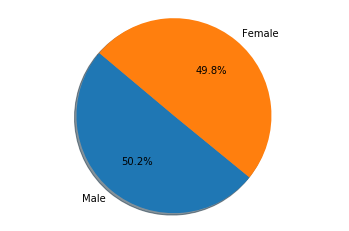

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
distributed = [125, 124]
explode = (0.1, 0)
plt.pie(distributed, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor = combined_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
cols = ["Mouse ID", "Timepoint"]

#max_tumor[cols]

merged_data = max_tumor[cols].merge(combined_data, on=cols, how="left")
merged_data

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
244           48.710661                 0  
245           30.638696                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [11]:
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

infub_quartiles = round(infubinol.quantile([.25,.5,.75]),2)
infub_lowerq = round(infub_quartiles[0.25],2)
infub_upperq= round(infub_quartiles[0.75],2)
infub_iqr = round((infub_upperq - infub_lowerq),2)

print(f"The lower quartile of occupancy is: {infub_lowerq}")
print(f"The upper quartile of occupancy is: {infub_upperq}")
print(f"The interquartile range of occupancy is: {infub_iqr}")
print(f"The the median of occupancy is: {infub_quartiles[0.5]}")

infub_lower_bound = infub_lowerq - (1.5*infub_iqr)
infub_upper_bound = infub_upperq + (1.5*infub_iqr)

print(f"Values below {infub_lower_bound} could be outliers.")
print(f"Values above {infub_upper_bound} could be outliers.")

print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infub_lower_bound) | (infubinol > infub_upper_bound)]}")

The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The the median of occupancy is: 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [12]:
#merged_data[cols][merged_data["Drug Regimen"] == "Capomulin"]
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
#capomulin

capo_quartiles = round(capomulin.quantile([.25,.5,.75]),2)
capo_lowerq = round(capo_quartiles[0.25],2)
capo_upperq = round(capo_quartiles[0.75],2)
capo_iqr = round((capo_upperq - capo_lowerq),2)

print(f"The lower quartile of occupancy is: {capo_lowerq}")
print(f"The upper quartile of occupancy is: {capo_upperq}")
print(f"The interquartile range of occupancy is: {capo_iqr}")
print(f"The the median of occupancy is: {capo_quartiles[0.5]}")

capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.")

print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < capo_lower_bound) | (capomulin > capo_upper_bound)]}")

The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The the median of occupancy is: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
#ramicane

rami_quartiles = round(ramicane.quantile([.25,.5,.75]),2)
rami_lowerq = round(rami_quartiles[0.25],2)
rami_upperq = round(rami_quartiles[0.75],2)
rami_iqr = round((rami_upperq - rami_lowerq),2)

print(f"The lower quartile of occupancy is: {rami_lowerq}")
print(f"The upper quartile of occupancy is: {rami_upperq}")
print(f"The interquartile range of occupancy is: {rami_iqr}")
print(f"The the median of occupancy is: {rami_quartiles[0.5]}")

rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = round(rami_upperq + (1.5*rami_iqr),3)

print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.")

print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < rami_lower_bound) | (ramicane > rami_upper_bound)]}")

The lower quartile of occupancy is: 31.56
The upper quartile of occupancy is: 40.66
The interquartile range of occupancy is: 9.1
The the median of occupancy is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
#ceftamin

ceft_quartiles = round(ceftamin.quantile([.25,.5,.75]),2)
ceft_lowerq = round(ceft_quartiles[0.25],2)
ceft_upperq = round(ceft_quartiles[0.75],2)
ceft_iqr = round((ceft_upperq - ceft_lowerq),2)

print(f"The lower quartile of occupancy is: {ceft_lowerq}")
print(f"The upper quartile of occupancy is: {ceft_upperq}")
print(f"The interquartile range of occupancy is: {ceft_iqr}")
print(f"The the median of occupancy is: {ceft_quartiles[0.5]}")

ceft_lower_bound = round(ceft_lowerq - (1.5*ceft_iqr),3)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < ceft_lower_bound) | (ceftamin > ceft_upper_bound)]}")

The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 64.3
The interquartile range of occupancy is: 15.58
The the median of occupancy is: 59.85
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


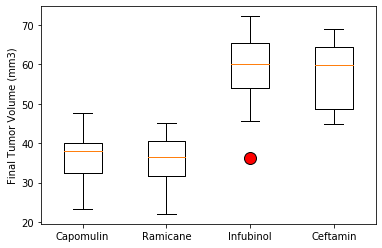

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

(-2, 47)

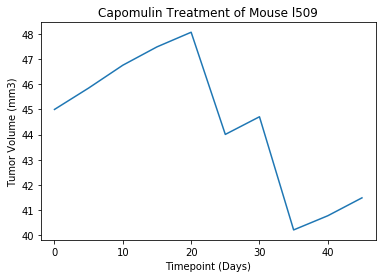

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
test = combined_data.loc[combined_data["Mouse ID"] == "l509"]
test_1 = test.set_index("Timepoint")

test_1["Tumor Volume (mm3)"].plot()
plt.show
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2, 47)

#test_1

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
captest = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
captest_1 = captest.groupby(["Mouse ID", "Weight (g)"])
captest_1 = captest_1[["Tumor Volume (mm3)"]].mean()
captest_1 = captest_1.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
final_cap = captest_1.reset_index()
final_cap

Mouse ID  Weight (g)  Average Tumor Volume (mm3)
0      b128          22                   41.963636
1      b742          21                   40.083699
2      f966          17                   36.505973
3      g288          19                   41.990097
4      g316          22                   44.613344
5      i557          24                   44.805810
6      i738          20                   39.141053
7      j119          23                   44.465236
8      j246          21                   43.216925
9      l509          21                   44.434474
10     l897          19                   42.507261
11     m601          17                   34.847470
12     m957          19                   39.049816
13     r157          25                   45.798970
14     r554          17                   36.509212
15     r944          25                   43.367364
16     s185          17                   34.559143
17     s710          23                   42.803733
18     t565          17                   39.328725
19     u364          17                   39.887495
20     v923          21                   41.581595
21     w150          23                   41.384825
22     w914          21                   41.352452
23     x401          15                   36.182040
24     y793          17                   38.506829

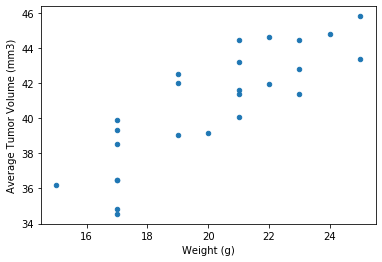

In [18]:
final_cap.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = final_cap.iloc[:,1]
avg_tumor = final_cap.iloc[:,2]
correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


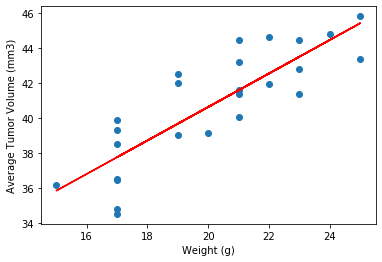

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()